# Machine learning exercise 3-4

##### Exercise 3 and 4
    1. Feature Selection
        - Exploratory data analysis
            - example data sample
        - Chi-2 test
        - Corelation base
    2. Feature extraction
        - Binary dummy variable (categorical)
        - Box-Cox transformation variable (numerical)
        - Polynomial features / combination of attributes
    3. Dimensionality reduction
        - Principal Component Analysis (PCA)

<br><br>

# 1. Feature selection
* Objectives - improve the prediction/accuracy by
    - identifying relevant attributes
    - removein the irrelevant/ partially relevant
  <br>
* Methods for measuring feature importance
    - Chi-2 test
    - Correlation based

<br><br>

#### Dataset dascription
For the following examples, we will use the a dataset for Mobile Price Classification<br>
Link: https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv <br>
<br>
<b>List of attributes</b> (colums): <br>
<br>
1. <b>battery_power:</b> Total energy a battery can store in one time measured in mAh <br>
2. <b>blue:</b> Has Bluetooth or not <br>
3. <b>clock_speed:</b> the speed at which microprocessor executes instructions <br>
4. <b>dual_sim:</b> Has dual sim support or not <br>
5. <b>fc:</b> Front Camera megapixels <br>
6. <b>four_g:</b> Has 4G or not <br>
7. <b>int_memory:</b> Internal Memory in Gigabytes <br>
8. <b>m_dep:</b> Mobile Depth in cm <br>
9. <b>mobile_wt:</b> Weight of mobile phone <br>
10. <b>n_cores:</b> Number of cores of the processor <br>
11. <b>pc:</b> Primary Camera megapixels <br>
12. <b>px_height:</b> Pixel Resolution Height <br>
13. <b>px_width:</b> Pixel Resolution Width <br>
14. <b>ram:</b> Random Access Memory in MegaBytes <br>
15. <b>sc_h:</b> Screen Height of mobile in cm <br>
16. <b>sc_w:</b> Screen Width of mobile in cm <br>
17. <b>talk_time:</b> the longest time that a single battery charge will last when you are <br>
18. <b>three_g:</b> Has 3G or not <br>
19. <b>touch_screen:</b> Has touch screen or not <br>
20. <b>wifi:</b> Has wifi or not <br>
<br>
21. <b>price_range:</b> This is the target variable with possible values
    - "0": low cost
    - "1": medium cost 
    - "2": high cost 
    - "3": very high cost 
<br>


### Exploratory analysis of the dataset
* more details about the different data attributes

<br>
<i>When we start working with a new dataset, it is of up most importance to get familiar with the data</i>


In [1]:
path = "../Data/"

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv(path + "train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
data.head(15)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0             842     0          2.2         0   1       0           7    0.6   
1            1021     1          0.5         1   0       1          53    0.7   
2             563     1          0.5         1   2       1          41    0.9   
3             615     1          2.5         0   0       0          10    0.8   
4            1821     1          1.2         0  13       1          44    0.6   
5            1859     0          0.5         1   3       0          22    0.7   
6            1821     0          1.7         0   4       1          10    0.8   
7            1954     0          0.5         1   0       0          24    0.8   
8            1445     1          0.5         0   0       0          53    0.7   
9             509     1          0.6         1   2       1           9    0.1   
10            769     1          2.9         1   0       0           9    0.1   
11           1520     1          2.2         0   5       1          33    0.5   
12           1815     0          2.8         0   2       0          33    0.6   
13            803     1          2.1         0   7       0          17    1.0   
14           1866     0          0.5         0  13       1          52    0.7   

    mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0         188        2  ...         20       756  2549     9     7         19   
1         136        3  ...        905      1988  2631    17     3          7   
2         145        5  ...       1263      1716  2603    11     2          9   
3         131        6  ...       1216      1786  2769    16     8         11   
4         141        2  ...       1208      1212  1411     8     2         15   
5         164        1  ...       1004      1654  1067    17     1         10   
6         139        8  ...        381      1018  3220    13     8         18   
7         187        4  ...        512      1149   700    16     3          5   
8         174        7  ...        386       836  1099    17     1         20   
9          93        5  ...       1137      1224   513    19    10         12   
10        182        5  ...        248       874  3946     5     2          7   
11        177        8  ...        151      1005  3826    14     9         13   
12        159        4  ...        607       748  1482    18     0          2   
13        198        4  ...        344      1440  2680     7     1          4   
14        185        1  ...        356       563   373    14     9          3   

    three_g  touch_screen  wifi  price_range  
0         0             0     1            1  
1         1             1     0            2  
2         1             1     0            2  
3         1             0     0            2  
4         1             1     0            1  
5         1             0     0            1  
6         1             0     1            3  
7         1             1     1            0  
8         1             0     0            0  
9         1             0     0            0  
10        0             0     0            3  
11        1             1     1            3  
12        1             0     0            1  
13        1             0     1            2  
14        1             0     1            0  

[15 rows x 21 columns]

In [4]:
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.max_open_warning": 0})

data.boxplot(grid=False, rot=45, fontsize=11, figsize=(15,7))
plt.show()

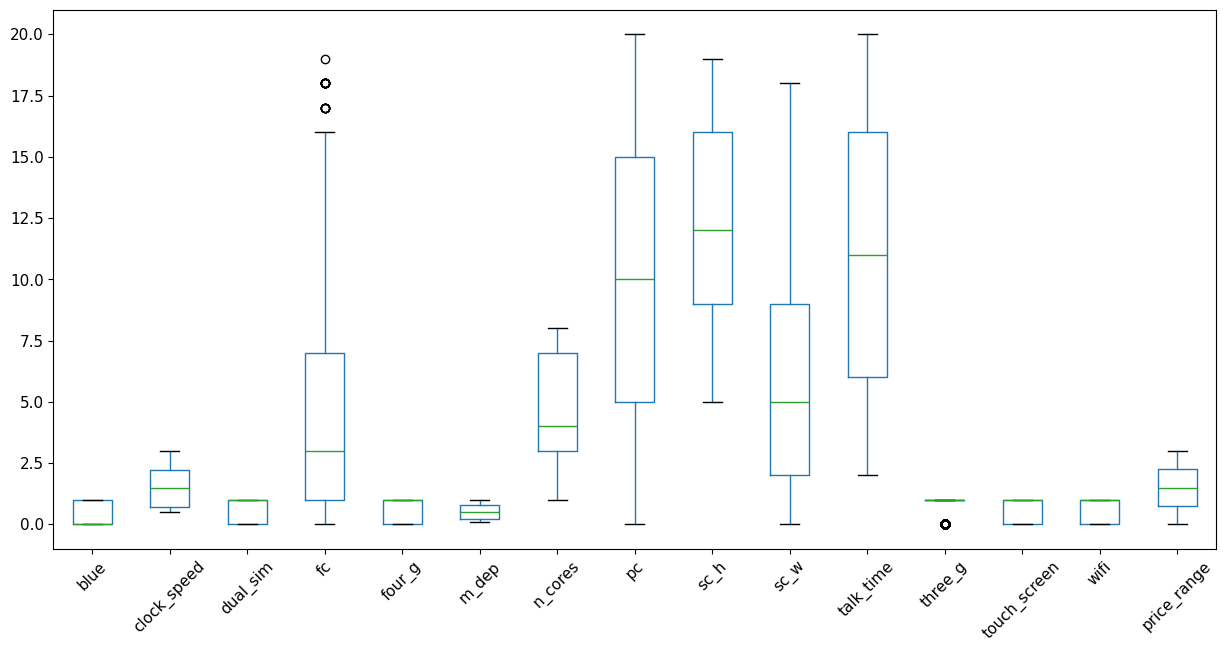

In [5]:
data_sub = data.drop(['battery_power', 'px_height', 'px_width', 'ram', 'mobile_wt', 'int_memory'], axis=1)

data_sub.boxplot(grid=False, rot=45, fontsize=11, figsize=(15,7))
plt.show()

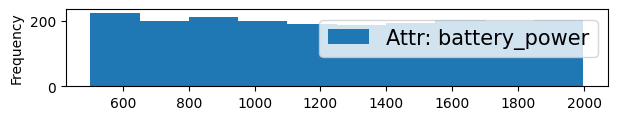

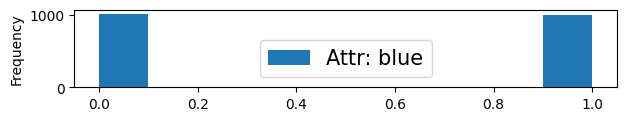

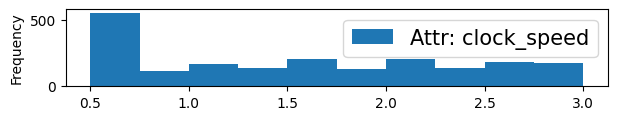

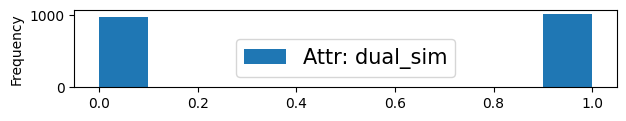

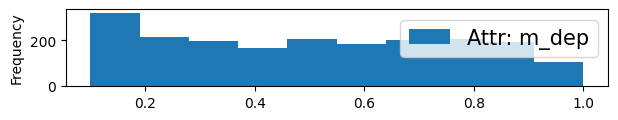

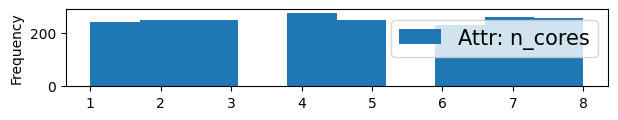

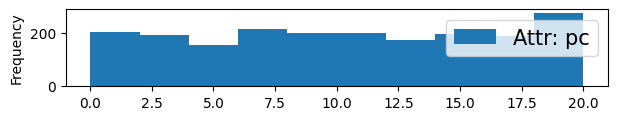

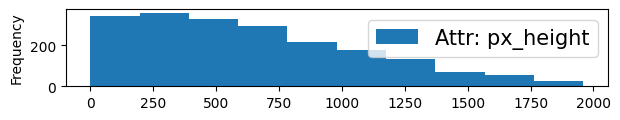

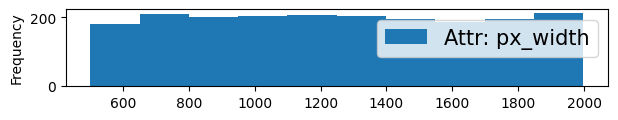

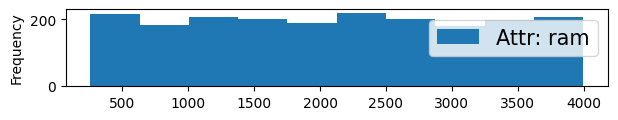

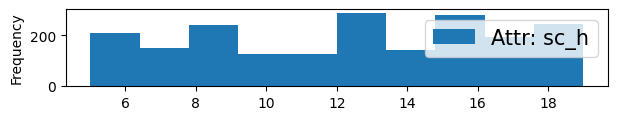

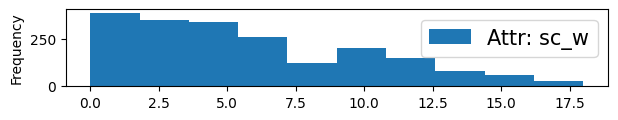

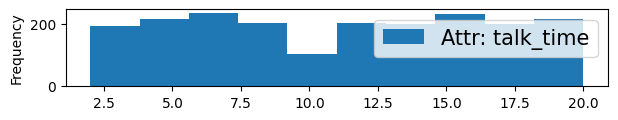

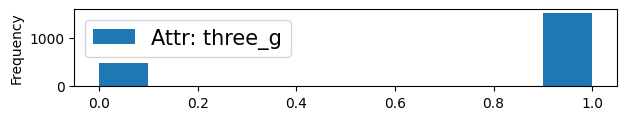

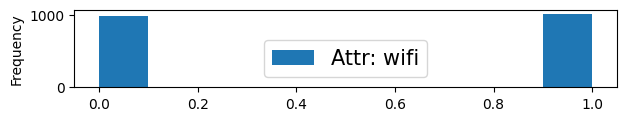

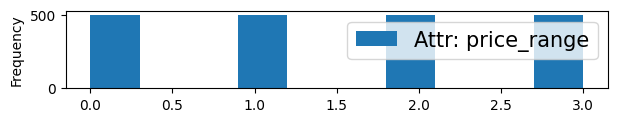

In [6]:
i=0
for column in data:
    s = data[column]
    fig, ax = plt.subplots(figsize=(7,1))
    ax = s.plot.hist()
    ax.legend(["Attr: " + column], fontsize=15)
    plt.show()

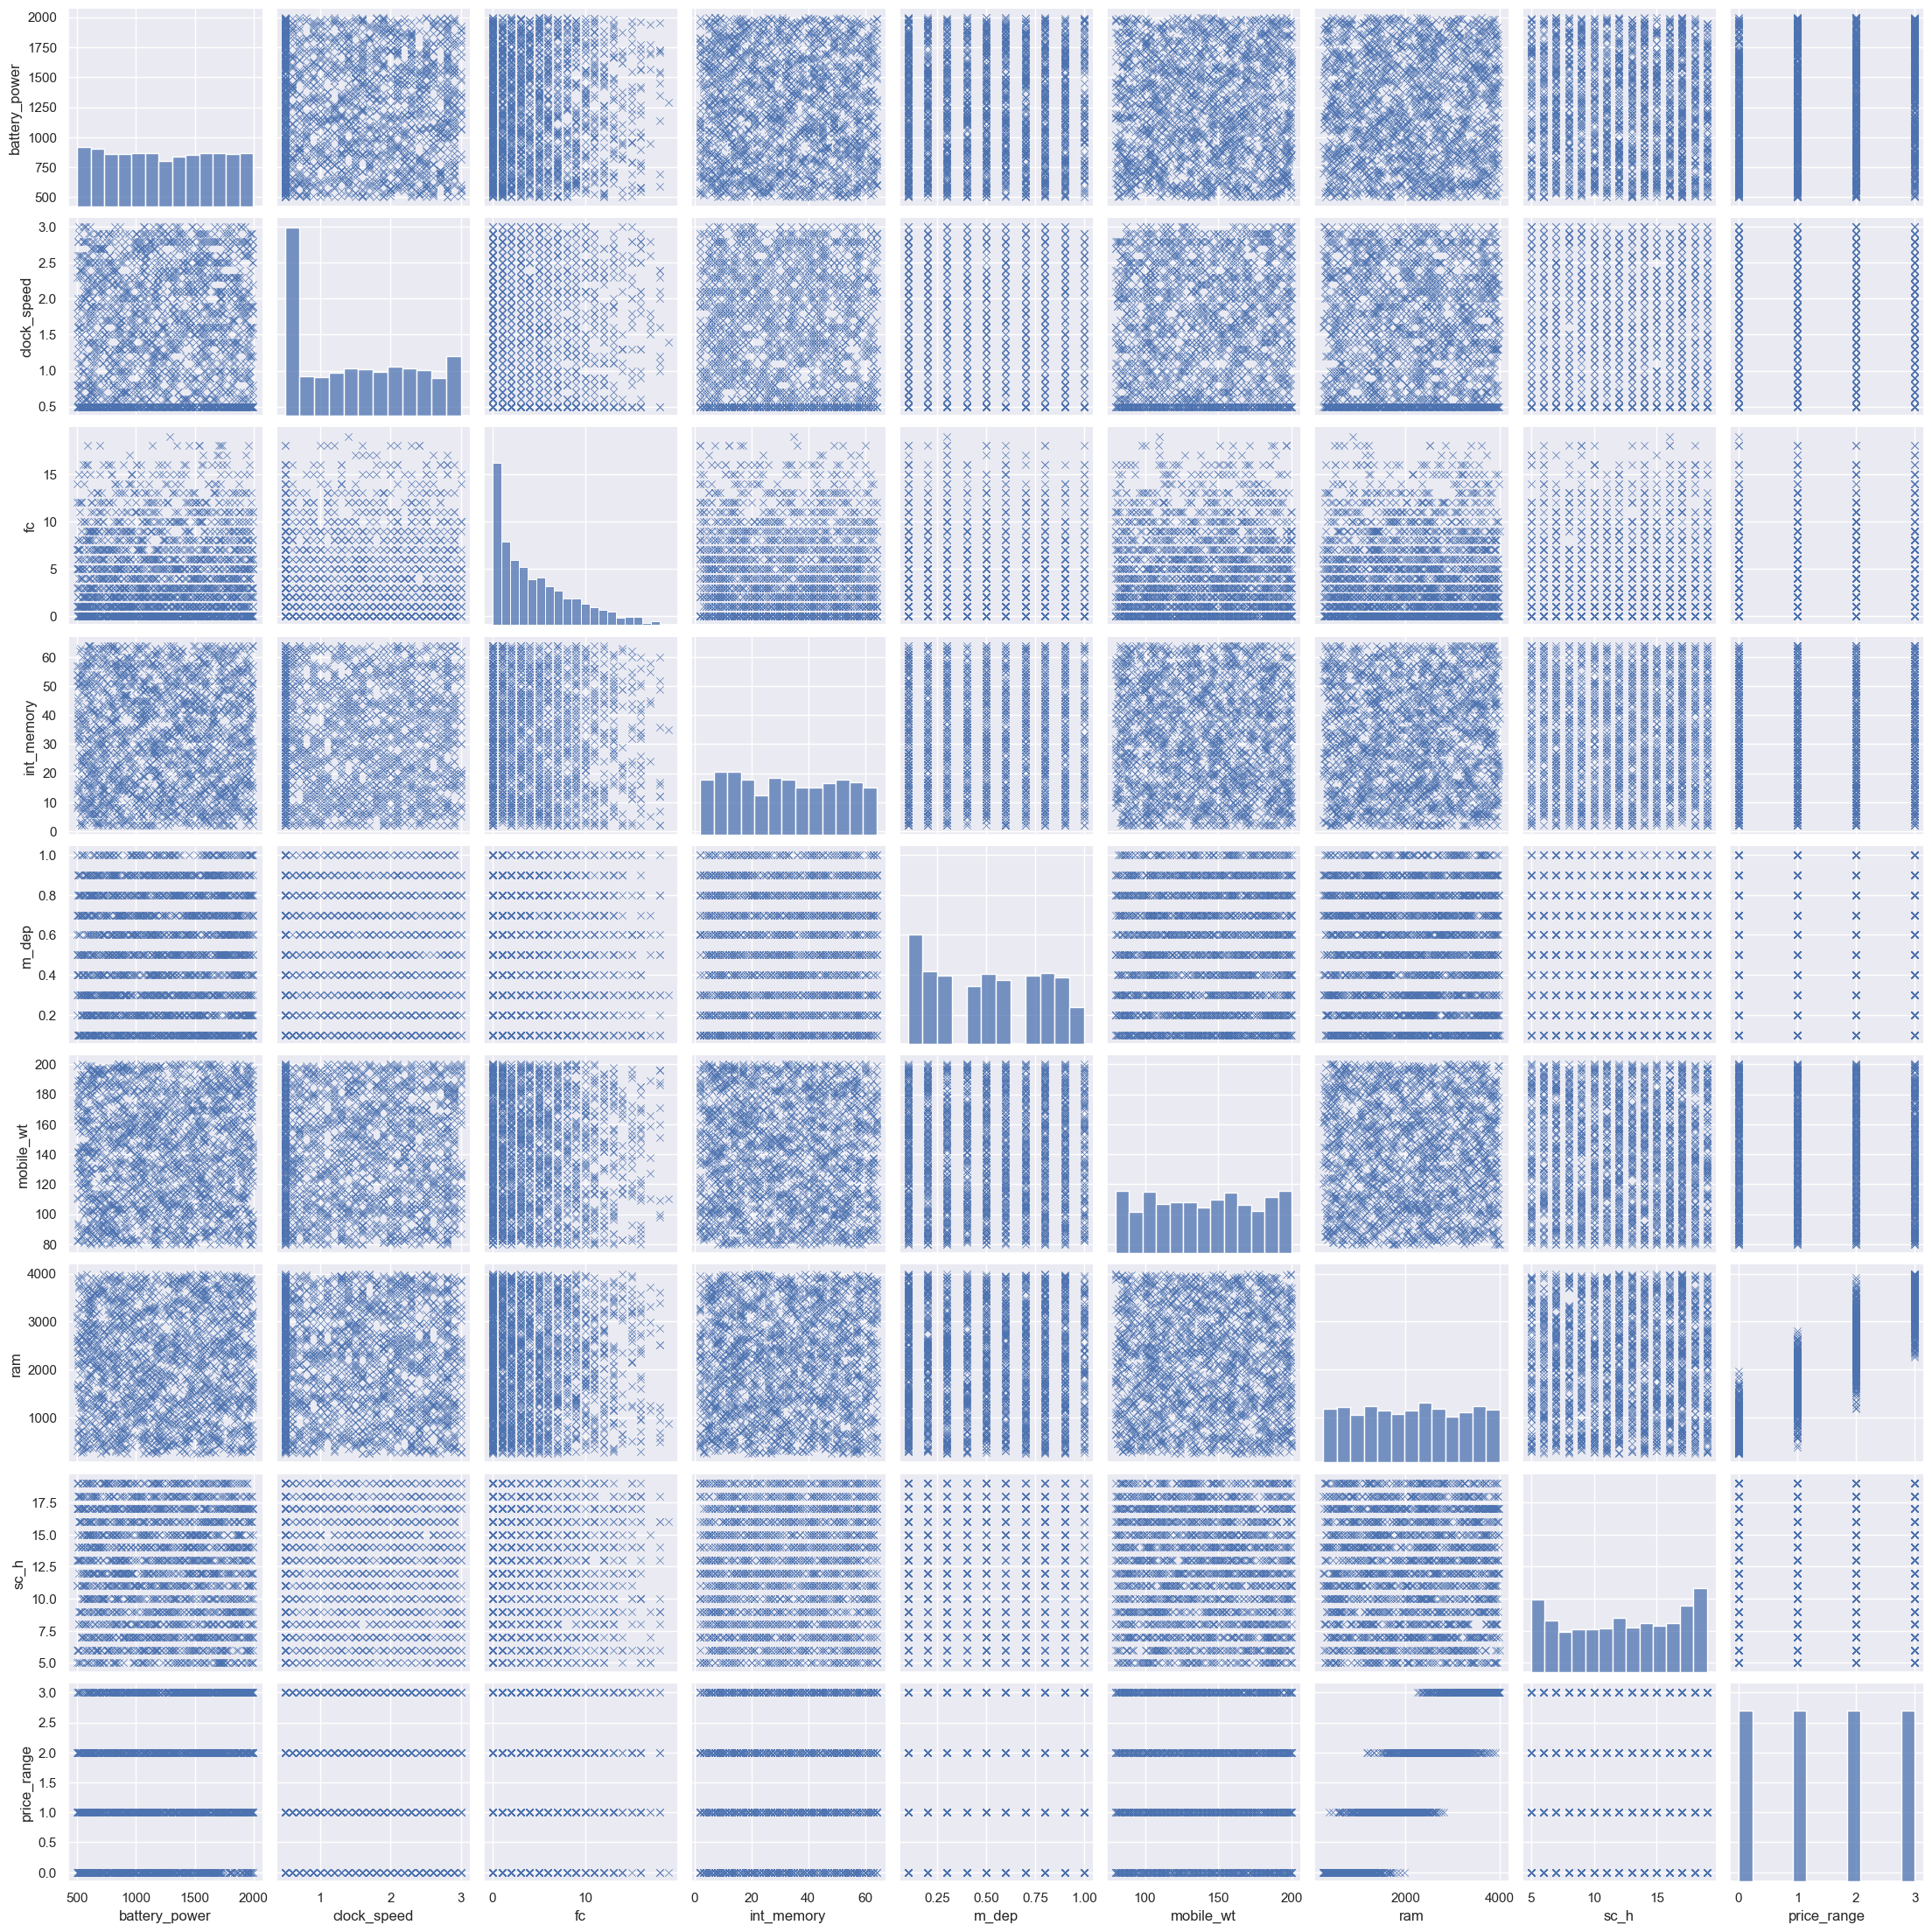

In [7]:
import seaborn as sns

sns.set()
selected_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'ram', 'sc_h', 'price_range']

sns.pairplot(data[selected_cols], markers="x")
plt.show();

In [8]:
data.shape

(2000, 21)

### Select the most important features
### Method 1: Chi-2 test

* Context: our dataset has 21 attributes (columns)
    - Explanatory variables: $X = (x_1, x_2, ..., x_{20}$
    - Explained (target) variable: $Y = x_{21}$ which is "price_range"
<br><br>
* We will use <i>sklearn.feature_selection</i> to compute <b>Chi-2 stats</b>
    - SelectKBest: 
        - Built-in class in <i>sklearn.feature_selection</i>; initialize it with a chi2 function and the number of 'best beatures' to select
    - Chi-squared stats: 
        - Objective: Estimate the <b>dependance between each feature (attribute) and the target variable Y</b>. The computed Chi2 score can be used to select the n features with the highest values for the test chi-squared statistic from X, relative to the target classes Y.
        - Function: chi2($x_i$, Y) for $i \in 1, ..., 20$

        Attribute          Score      P-values
13            ram  931267.519053  0.000000e+00
11      px_height   17363.569536  0.000000e+00
0   battery_power   14129.866576  0.000000e+00
12       px_width    9810.586750  0.000000e+00
8       mobile_wt      95.972863  1.140850e-20
6      int_memory      89.839124  2.371978e-19
15           sc_w      16.480319  9.037659e-04
16      talk_time      13.236400  4.152292e-03
4              fc      10.135166  1.745143e-02
14           sc_h       9.614878  2.214014e-02


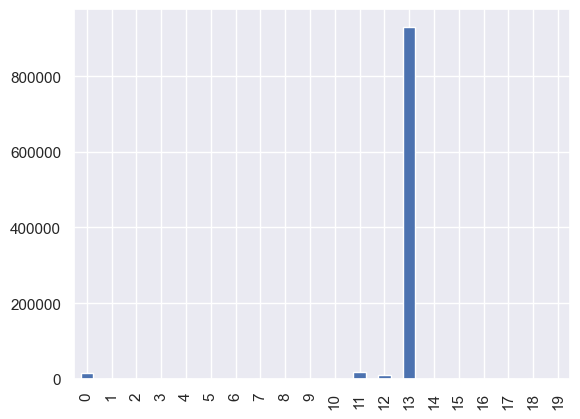

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separate the target Y from x1, ..., x20
X = data.iloc[:, 0:20] # explanatory variables
Y = data.iloc[:, -1] # target

# init SelectKBest
best_feature = SelectKBest(score_func=chi2, k=10)

# fit (invokes the chi2 fun)
fit_obj = best_feature.fit(X, Y)

# the instance fit_obj has attributes scores_ and pvalues_
scores = pd.DataFrame(fit_obj.scores_)
pvalues = pd.DataFrame(fit_obj.pvalues_)

# Get the column names
columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([columns, scores, pvalues], axis =1) # Concatenate and obtain a DataFrame
feature_scores.columns= ["Attribute", "Score", "P-values"] # Set the DataFrame column names

# Select the n best (largest) scores
best_dataframe_chi2 = feature_scores.nlargest(10, "Score")

print(best_dataframe_chi2)

feature_scores["Score"].plot(kind="bar")
plt.show()


<br>

### Select the most important features
#### Method 2: A correlation-based approach

* Context: our dataset contains 21 attributes (columns)
    - Explanatory variables: $X = (x_1, x_2, ..., x_{20})$ 
    - Explained (target) variable: $Y = x_{21}$ i.e. 'price_range'
<br><br>
* We will compute the <b>correlation matrix</b> of the DataFrame

    - For two variables (attributes) $u$ and $v$, for $n$ data instances: $\displaystyle Corr(u, v) =\frac{\displaystyle \sum ^n _{i=1}(u_i - \bar{u})(v_i - \bar{v})}{\sqrt{\sum ^n _{i=1}(u_i - \bar{u})^2} \sqrt{\sum ^n _{i=1}(v_i - \bar{v})^2}}$, 
    <br> where $\bar{u}$ and $\bar{v}$ are the respective empirical means of $u$ and $v$. 
    - df.corr(): 
        - Built-in function in pandas.DataFrame
    - Use seaborn for visualization: 
    - In particular, we are interested in the correlation coefficients $\displaystyle Corr(x_i, Y), \forall i \in 1, ..., 20$ i.e. the correlations between each feature and the target variable

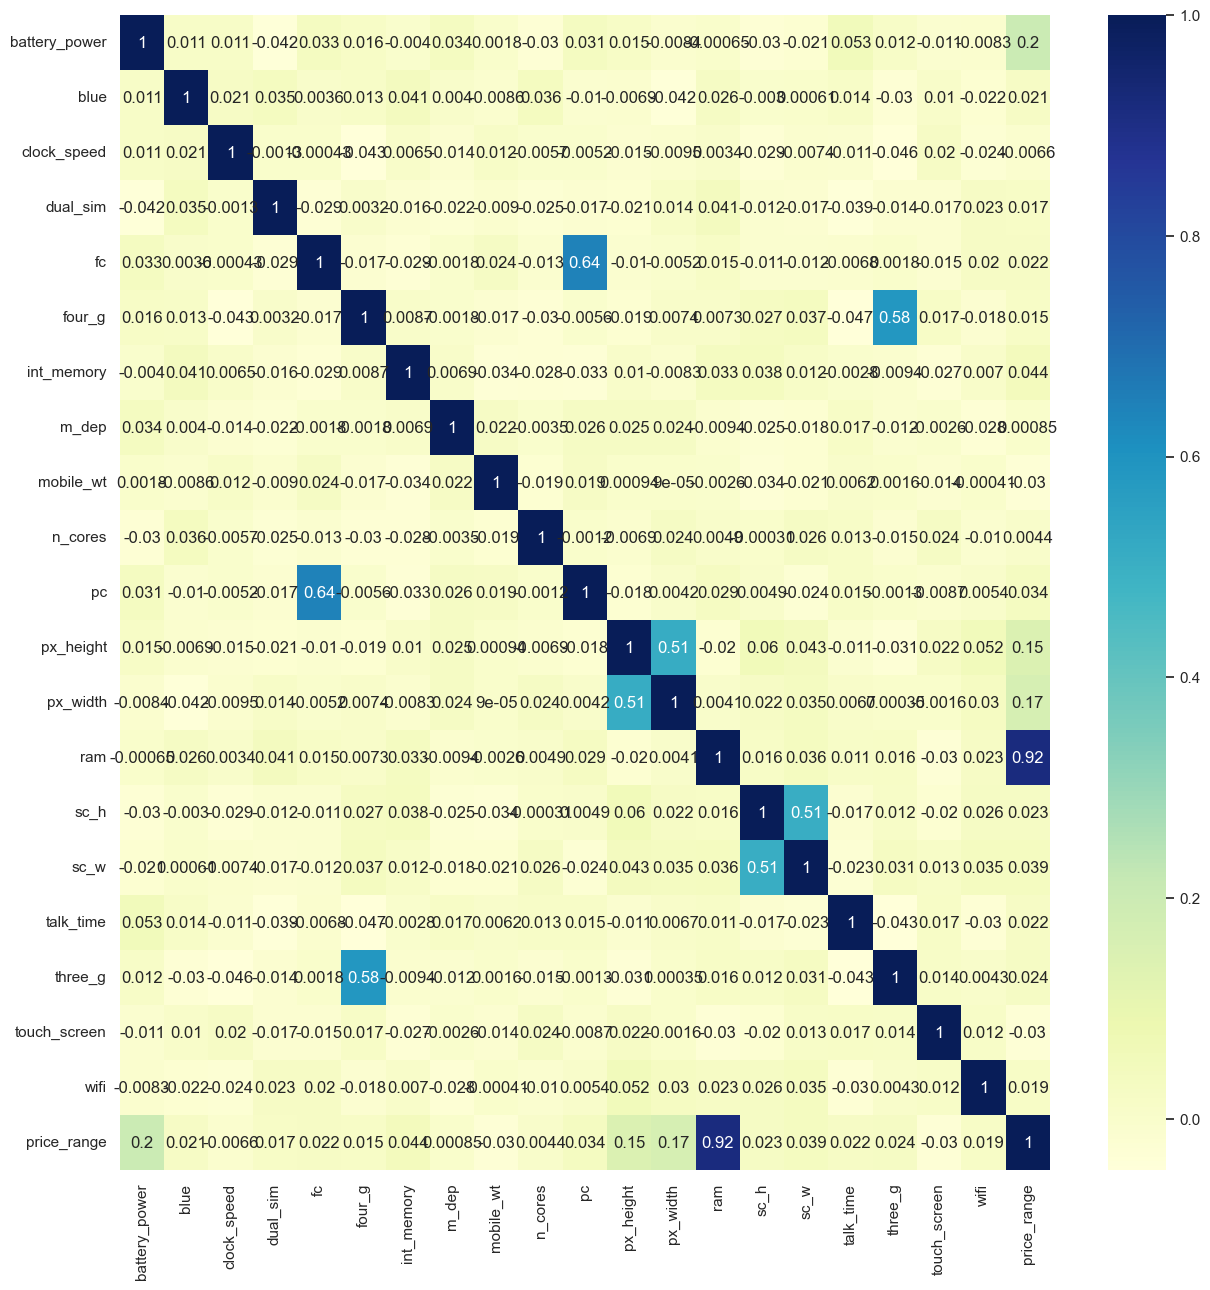

In [10]:
# Separate the target Y from x1, ..., x20
X_2 = data.iloc[:, 0:20] # explanatory variables
Y_2 = data.iloc[:, -1] # target

#Compute correlation matrix
correlationMatrix = data.corr()

correlationFeatures = correlationMatrix.index

#Plot
plt.figure(figsize=(15,15))
g = sns.heatmap(data[correlationFeatures].corr(), annot=True, cmap="YlGnBu")
plt.show()

##### Now, retrieve the correlations $\displaystyle Corr(x_i, Y), \forall i \in 1, ..., 20$

In [11]:
print("Shape of correlation matrix: " + str(correlationMatrix.shape))

correlationFeatureToY = correlationMatrix['price_range']
print(type(correlationFeatureToY))
correlationFeatureToY = correlationFeatureToY.drop("price_range")

print(correlationFeatureToY)

Shape of correlation matrix: (21, 21)
<class 'pandas.core.series.Series'>
battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
Name: price_range, dtype: float64


ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
Name: price_range, dtype: float64


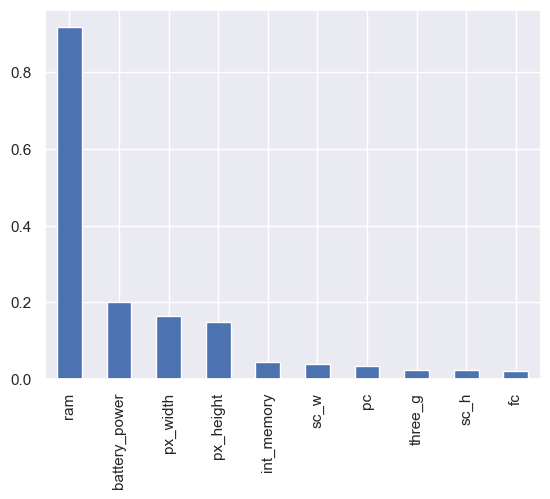

In [12]:
#Sort and get k best
bestFeaturesCorrelation = correlationFeatureToY.nlargest(10)
print(bestFeaturesCorrelation)

bestFeaturesCorrelation.plot(kind="bar")
plt.show()

<br><br>

The attribute 'ram' is highly important according to both <i>Chi-square</i> and <i>Correlation</i>. But there are few differences in the results. 
<br> 

* Let us compare the results of these two approaches: compute the intersection of both result sets in order to find out the common <i>best</i> attributes

In [13]:
s1 = set(best_dataframe_chi2['Attribute']) # best_df_chi2 is a 'pandas.DataFrame'
s2 = set(bestFeaturesCorrelation.index)  # best_features_corr is a 'pandas.core.series.Series'

s1.intersection(s2)


{'battery_power',
 'fc',
 'int_memory',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w'}

# 2. Feature extraction
* Objectives - Improve prediction/classification accuracy by
    - creating supplementary attributes from the existing data
    - applying linear or non-linear transormation to the data
    - combining existing attributes to produce new features
<br>
* Methods:
    - Binary dummy variables (categorical variables)
    - Box-Cox transformation (numerical)
    - Polynomial features / combination of attributes

## 2.1 Binary dummy variables
Represent an attribute with $k$ possible values as $k-1$ binary columns

* Example:
<br><br>
"Friday"<br> 
"Tuesday"
<br><br>
can be represented as <br><br>
(0, 0, 0, 0, 1, 0) <br>
(0, 1, 0, 0, 0, 0)

In [14]:
#categorical features to binary dummy variables
# "cast" to Categorical
temp = pd.Categorical(data["m_dep"])  # the feature 'm_dep' corresponds to 'Mobile Depth in cm'

# the built-in function 'get_dummies' can be applied to Categorical variables
df_temp = pd.get_dummies(temp, drop_first=1)

print(df_temp.shape)
df_temp.head(15)

(2000, 9)


0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.0
0   False  False  False  False   True  False  False  False  False
1   False  False  False  False  False   True  False  False  False
2   False  False  False  False  False  False  False   True  False
3   False  False  False  False  False  False   True  False  False
4   False  False  False  False   True  False  False  False  False
5   False  False  False  False  False   True  False  False  False
6   False  False  False  False  False  False   True  False  False
7   False  False  False  False  False  False   True  False  False
8   False  False  False  False  False   True  False  False  False
9   False  False  False  False  False  False  False  False  False
10  False  False  False  False  False  False  False  False  False
11  False  False  False   True  False  False  False  False  False
12  False  False  False  False   True  False  False  False  False
13  False  False  False  False  False  False  False  False   True
14  False  False  False  False  False   True  False  False  False

#### Box-Cox transormation
Given an attribute with $n$ observations/instances, transform it in such way that the distribution of the transformed results is similar to a Gaussian one. 
<br>
Benefit: Many models work better with normally distributed data

[ 6.69668458 48.6294831  57.11624457 ... 47.65625655 29.93832914
 35.80912018]


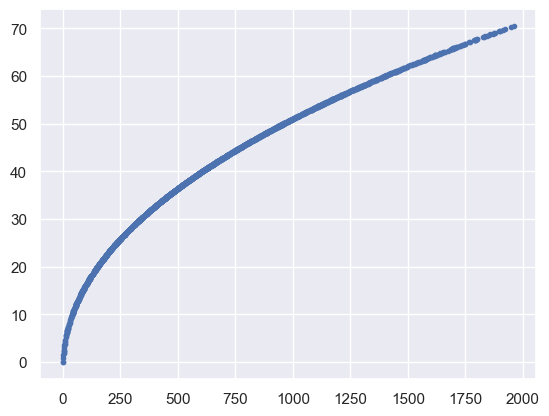

In [15]:
#Apply Box-Cox transformation

from scipy.stats import boxcox
col_name = "px_height"

transformed = boxcox(data[col_name] + 1)[0]
print(transformed)

plt.scatter(data[col_name], transformed, marker=".")
plt.show()

#### Polynomial features / combination of attributes

For features $(f_1, f_2, f_m)$, create combinations of the form: $(x_1 x_2, x_1 x_3, ..., x_1 x_m, ..., x_{m-1} x_m, ..., x_1^2 x_2, x_1^2 x_3, ..., x_{m-1} x_m^2)$
<br>
Benefit: The polynomial combination of features can increase the ML algorithms accuracy
* MinMaxScaler 
* PolynomialFeature

In [16]:
#1: Rescale data
from sklearn.preprocessing import MinMaxScaler

#Separate data
X = data.iloc[:, 0:20]  # Explanatory variables
Y = data.iloc[:, -1]    # Target variable 'Y' (i.e Price Range)

scaller = MinMaxScaler()
X_scaled = scaller.fit_transform(X)

#2: Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
""" Generate a new feature matrix consisting of all polynomial combinations 
of the features with degree less than or equal to the specified degree. 
For example, if an input sample is two dimensional and of the form [a, b], 
the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
"""

_deg = 3
poly_fe_obj = PolynomialFeatures(degree = _deg).fit(X_scaled)
X_scalled_poly_fe = poly_fe_obj.transform(X_scaled)

In [17]:
#Info
print("N features = " + str(poly_fe_obj.n_output_features_))
features_li = poly_fe_obj.get_feature_names_out()
print(features_li)
print()

N features = 1771
['1' 'x0' 'x1' ... 'x18^2 x19' 'x18 x19^2' 'x19^3']



In [18]:
pf_df = pd.DataFrame(X_scalled_poly_fe)
pf_df.columns = features_li
pf_df.head(15)

1        x0   x1    x2   x3        x4   x5        x6        x7  \
0   1.0  0.227789  0.0  0.68  0.0  0.052632  0.0  0.080645  0.555556   
1   1.0  0.347361  1.0  0.00  1.0  0.000000  1.0  0.822581  0.666667   
2   1.0  0.041416  1.0  0.00  1.0  0.105263  1.0  0.629032  0.888889   
3   1.0  0.076152  1.0  0.80  0.0  0.000000  0.0  0.129032  0.777778   
4   1.0  0.881764  1.0  0.28  0.0  0.684211  1.0  0.677419  0.555556   
5   1.0  0.907148  0.0  0.00  1.0  0.157895  0.0  0.322581  0.666667   
6   1.0  0.881764  0.0  0.48  0.0  0.210526  1.0  0.129032  0.777778   
7   1.0  0.970608  0.0  0.00  1.0  0.000000  0.0  0.354839  0.777778   
8   1.0  0.630595  1.0  0.00  0.0  0.000000  0.0  0.822581  0.666667   
9   1.0  0.005344  1.0  0.04  1.0  0.105263  1.0  0.112903  0.000000   
10  1.0  0.179025  1.0  0.96  1.0  0.000000  0.0  0.112903  0.000000   
11  1.0  0.680695  1.0  0.68  0.0  0.263158  1.0  0.500000  0.444444   
12  1.0  0.877756  0.0  0.92  0.0  0.105263  0.0  0.500000  0.555556   
13  1.0  0.201737  1.0  0.64  0.0  0.368421  0.0  0.241935  1.000000   
14  1.0  0.911824  0.0  0.00  0.0  0.684211  1.0  0.806452  0.666667   

          x8  ...  x17^3  x17^2 x18  x17^2 x19  x17 x18^2  x17 x18 x19  \
0   0.900000  ...    0.0        0.0        0.0        0.0          0.0   
1   0.466667  ...    1.0        1.0        0.0        1.0          0.0   
2   0.541667  ...    1.0        1.0        0.0        1.0          0.0   
3   0.425000  ...    1.0        0.0        0.0        0.0          0.0   
4   0.508333  ...    1.0        1.0        0.0        1.0          0.0   
5   0.700000  ...    1.0        0.0        0.0        0.0          0.0   
6   0.491667  ...    1.0        0.0        1.0        0.0          0.0   
7   0.891667  ...    1.0        1.0        1.0        1.0          1.0   
8   0.783333  ...    1.0        0.0        0.0        0.0          0.0   
9   0.108333  ...    1.0        0.0        0.0        0.0          0.0   
10  0.850000  ...    0.0        0.0        0.0        0.0          0.0   
11  0.808333  ...    1.0        1.0        1.0        1.0          1.0   
12  0.658333  ...    1.0        0.0        0.0        0.0          0.0   
13  0.983333  ...    1.0        0.0        1.0        0.0          0.0   
14  0.875000  ...    1.0        0.0        1.0        0.0          0.0   

    x17 x19^2  x18^3  x18^2 x19  x18 x19^2  x19^3  
0         0.0    0.0        0.0        0.0    1.0  
1         0.0    1.0        0.0        0.0    0.0  
2         0.0    1.0        0.0        0.0    0.0  
3         0.0    0.0        0.0        0.0    0.0  
4         0.0    1.0        0.0        0.0    0.0  
5         0.0    0.0        0.0        0.0    0.0  
6         1.0    0.0        0.0        0.0    1.0  
7         1.0    1.0        1.0        1.0    1.0  
8         0.0    0.0        0.0        0.0    0.0  
9         0.0    0.0        0.0        0.0    0.0  
10        0.0    0.0        0.0        0.0    0.0  
11        1.0    1.0        1.0        1.0    1.0  
12        0.0    0.0        0.0        0.0    0.0  
13        1.0    0.0        0.0        0.0    1.0  
14        1.0    0.0        0.0        0.0    1.0  

[15 rows x 1771 columns]

Note that after applying the polynomial feature extraction, there are $1771$ different features. 
<br>
Let us see which ones are the most important ones, according to the $Chi^2$ feature selection test. 

In [19]:
# init SelectKBest
best_fe_poly = SelectKBest(score_func=chi2, k=20)

# fit (invokes the chi2 fun)
# APPLY TO THE POLYNOMIAL FEATURES
fit_obj_poly = best_fe_poly.fit(pf_df, Y)

# the instance fit_obj has attributes scores_ and pvalues_
scores_poly = pd.DataFrame(fit_obj_poly.scores_)
pvals_poly = pd.DataFrame(fit_obj_poly.pvalues_)

feature_scores_poly = pd.concat([pd.DataFrame(pf_df.columns), scores_poly, pvals_poly], axis=1)  # Concatenate and obtain a DataFrame
feature_scores_poly.columns = ['Attribute', 'Score', 'P-values']   # Set the DataFrame column names

# Select the n best (largest) scores
best_df_chi2_poly = feature_scores_poly.nlargest(20, 'Score')
print(best_df_chi2_poly) 

      Attribute       Score       P-values
1687      x13^3  498.964294  8.000604e-108
203       x13^2  438.306439   1.113737e-94
1691  x13^2 x17  341.220133   1.187720e-73
413    x0 x13^2  307.671995   2.174022e-66
1659  x12 x13^2  288.923207   2.482844e-62
14          x13  282.971271   4.818448e-61
1688  x13^2 x14  249.627581   7.877261e-54
1183   x5 x13^2  249.092674   1.028174e-53
927    x3 x13^2  241.737233   4.007045e-52
1693  x13^2 x19  235.750289   7.897179e-51
1288   x6 x13^2  232.677143   3.647304e-50
603    x1 x13^2  232.050546   4.982589e-50
1578  x10 x13^2  225.109591   1.578073e-48
207     x13 x17  224.717506   1.918192e-48
1709  x13 x17^2  224.717506   1.918192e-48
34       x0 x13  219.674245   2.361224e-47
1690  x13^2 x16  219.300736   2.843657e-47
1523   x9 x13^2  217.996128   5.443589e-47
1692  x13^2 x18  214.281545   3.457792e-46
196     x12 x13  202.513833   1.207748e-43


x13 corresponds to RAM

# 2. Dimensionality reduction
* Methods:
    - Preprocessing: Scaling of the data attributes
    - Principal Component Analysis (PCA)
<br>
* Objective- Improve the prediction/classification accuracy
    - retaining the important attributes
    - reducing the total number of attributes
    - performing linear combination of the existing attributes to produce new features

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
# Separate the target Y from x1, ..., x20
X = data.iloc[:, 0:20]  # Explanatory variables
Y = data.iloc[:, -1]    # Target variable 'Y' (i.e Price Range)

X = StandardScaler().fit_transform(X)

n_pcs = 5
pca_obj = PCA(n_components=n_pcs) # initialise
principal_components = pca_obj.fit_transform(X) # compute the principal components

principalComponents_df = pd.DataFrame(data=principal_components, columns=["PC 1","PC 2","PC 3","PC 4","PC 5"])

principalComponents_df.head(10)

PC 1      PC 2      PC 3      PC 4      PC 5
0  0.323497 -2.616894 -0.587733  1.255776 -0.434201
1 -1.998340  0.572836  0.344679 -1.113777  0.573443
2 -1.301465  0.190101  0.085441 -1.976486  0.610520
3 -1.149410 -0.274381  1.666841 -0.234412 -0.550274
4  1.636494  1.291291 -0.296079 -1.831218 -1.755646
5 -0.400935 -0.289594  0.725204 -1.152168 -0.445849
6 -0.064713  0.911750 -0.617461  0.328755 -1.602171
7 -1.292564 -0.980294 -0.365527 -0.236030 -0.311892
8  0.370931 -0.665209 -0.658834  0.740401 -2.236312
9 -1.253309  1.533696  0.659599  0.726254  0.768845

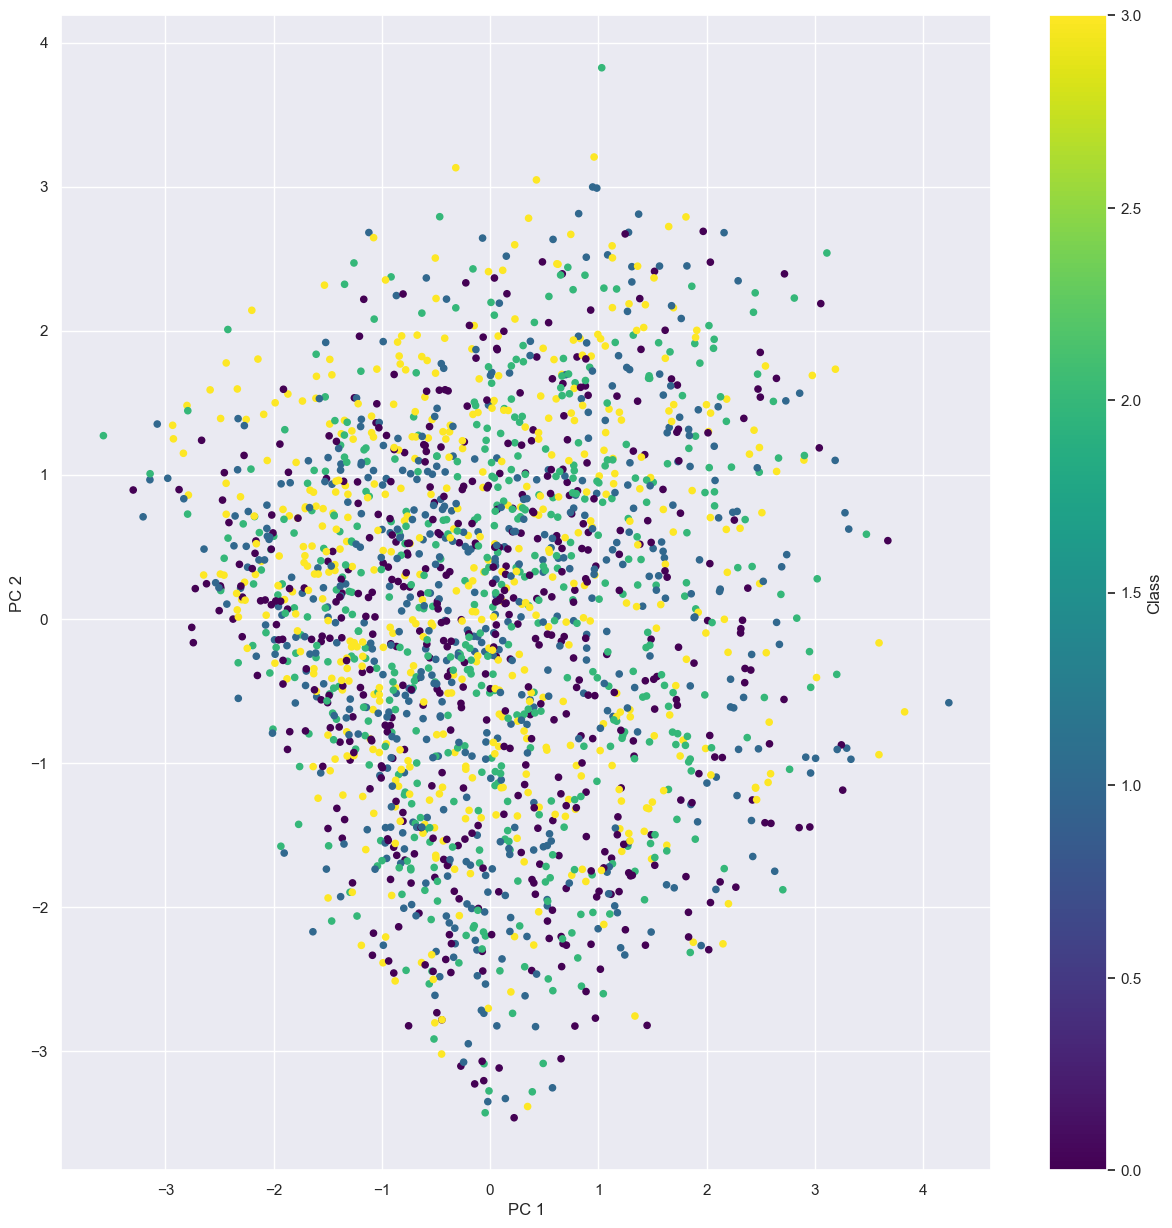

In [22]:
pc_df = principalComponents_df
pc_df["Class"] = Y # Y was not changed

ax = pc_df.plot.scatter(x="PC 1", y="PC 2", c="Class", figsize=(15,15), colormap="viridis")
plt.show()

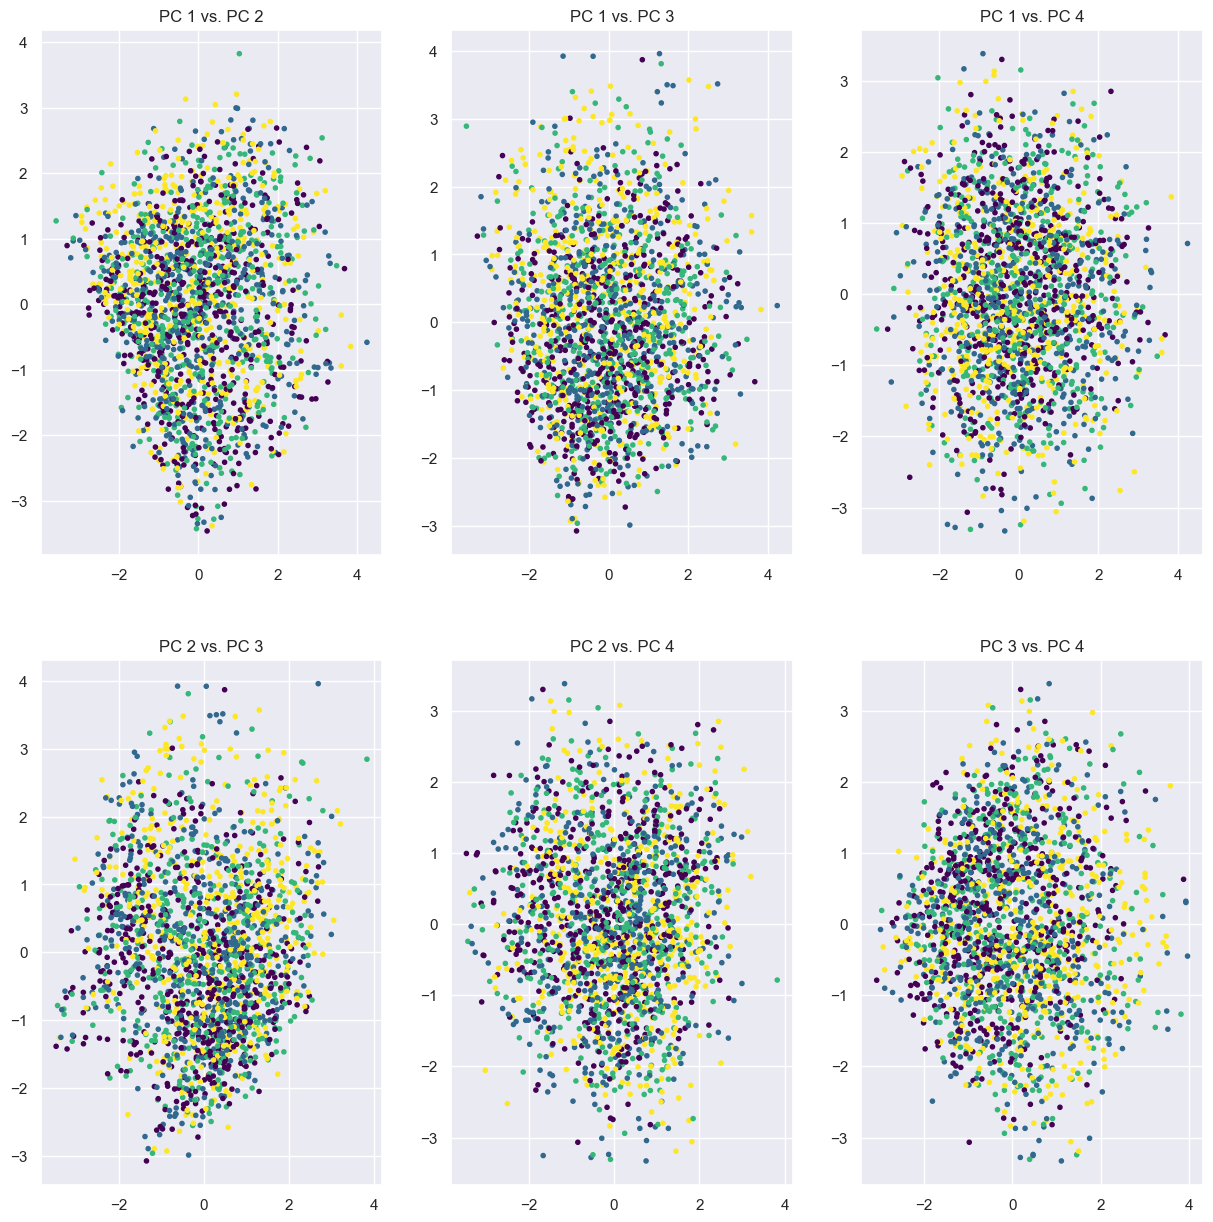

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(15,15))

ax[0][0].set_title('PC 1 vs. PC 2')
ax[0][0].scatter(pc_df["PC 1"], pc_df["PC 2"], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[0][1].set_title('PC 1 vs. PC 3')
ax[0][1].scatter(pc_df["PC 1"], pc_df["PC 3"], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[0][2].set_title('PC 1 vs. PC 4')
ax[0][2].scatter(pc_df["PC 1"], pc_df["PC 4"], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][0].set_title('PC 2 vs. PC 3')
ax[1][0].scatter(pc_df["PC 2"], pc_df["PC 3"], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][1].set_title('PC 2 vs. PC 4')
ax[1][1].scatter(pc_df["PC 2"], pc_df["PC 4"], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][2].set_title('PC 3 vs. PC 4')
ax[1][2].scatter(pc_df["PC 3"], pc_df["PC 4"], c = pc_df["Class"], cmap ='viridis', marker=".")

plt.show() 

### Do exactly the same on the dataset of Polynomial features

In [24]:
X_poly_fe = pf_df  # Explanatory variables
Y = data.iloc[:, -1] # Target variable 'Y' (i.e Price Range)

# Standardize features by removing the mean and scaling to unit variance: scaled = (x - mean(x)) / sd(x)
X_poly_fe_scaled = StandardScaler().fit_transform(X_poly_fe)

pca = PCA(n_components=10)
PCs_poly_fe = pca.fit_transform(X_poly_fe_scaled)

PCs_poly_fe_df = pd.DataFrame(data=PCs_poly_fe)
PCs_poly_fe_df.head(15)



0          1          2          3          4          5  \
0  -19.926965   1.473978  -3.605071  -3.667698   1.397629  -3.245574   
1    7.973540 -18.512642   2.194975   9.981432  -2.629670   8.963493   
2    6.539589 -13.320816   3.813155  12.791293  -2.511100  13.231675   
3   -1.289843  -5.315139  -9.693729  -4.034098 -17.992582  -3.890490   
4   13.703937  14.290512  12.953388   2.495876 -14.928424  20.045206   
5  -11.048127   0.485272  -0.927580  -2.791959   3.510364  -0.725632   
6    9.141835  -2.862657   9.436681 -13.016680  -0.357641  -5.573605   
7   -8.086358  -8.255239  -5.912812  -0.084367  13.725779   5.425661   
8   -6.976965   0.986533  -0.864166  -0.013709 -17.121977  -0.607663   
9   -5.571779  -5.489746   5.389724   0.217762  -3.814374 -10.587611   
10 -21.037242   0.845840  -3.504768   8.263976  -2.684499  -3.778740   
11  35.064219  -0.384518   6.415831   1.724298 -10.352895   3.208428   
12 -11.841749   5.834345   1.412448  -6.202453  -4.817935  -0.673612   
13  -5.254796   8.997979  -0.202482   3.528642  -5.428322  -2.647851   
14   1.675313  11.605593  16.135355 -15.415124   4.913394  -7.829289   

            6          7          8          9  
0   -0.299049   4.698569   5.948205   4.798465  
1    3.373767 -10.343371 -16.022464  -2.936376  
2    7.896897 -10.106762 -15.719293   0.746768  
3    4.704995  -6.153334   5.792875   0.230022  
4    6.200400   0.960881  -6.880918  -4.139032  
5    7.780215 -13.534979  -5.033657   3.491705  
6    2.338643   5.511062  11.843296  18.829416  
7    0.688870   0.292831  -4.764773   9.912094  
8    0.979745  -1.371166  -6.402269  12.744483  
9   -2.223921  -7.938357 -13.032282 -10.519722  
10  -0.688391  -0.598715   4.327905  -5.064715  
11 -17.174242  25.696821   9.414342   6.453907  
12  -0.688369  -3.967612  11.288547   1.446365  
13  10.467354  10.412765   4.895204   8.818971  
14  -0.029081   6.530428  -3.716296   9.414431

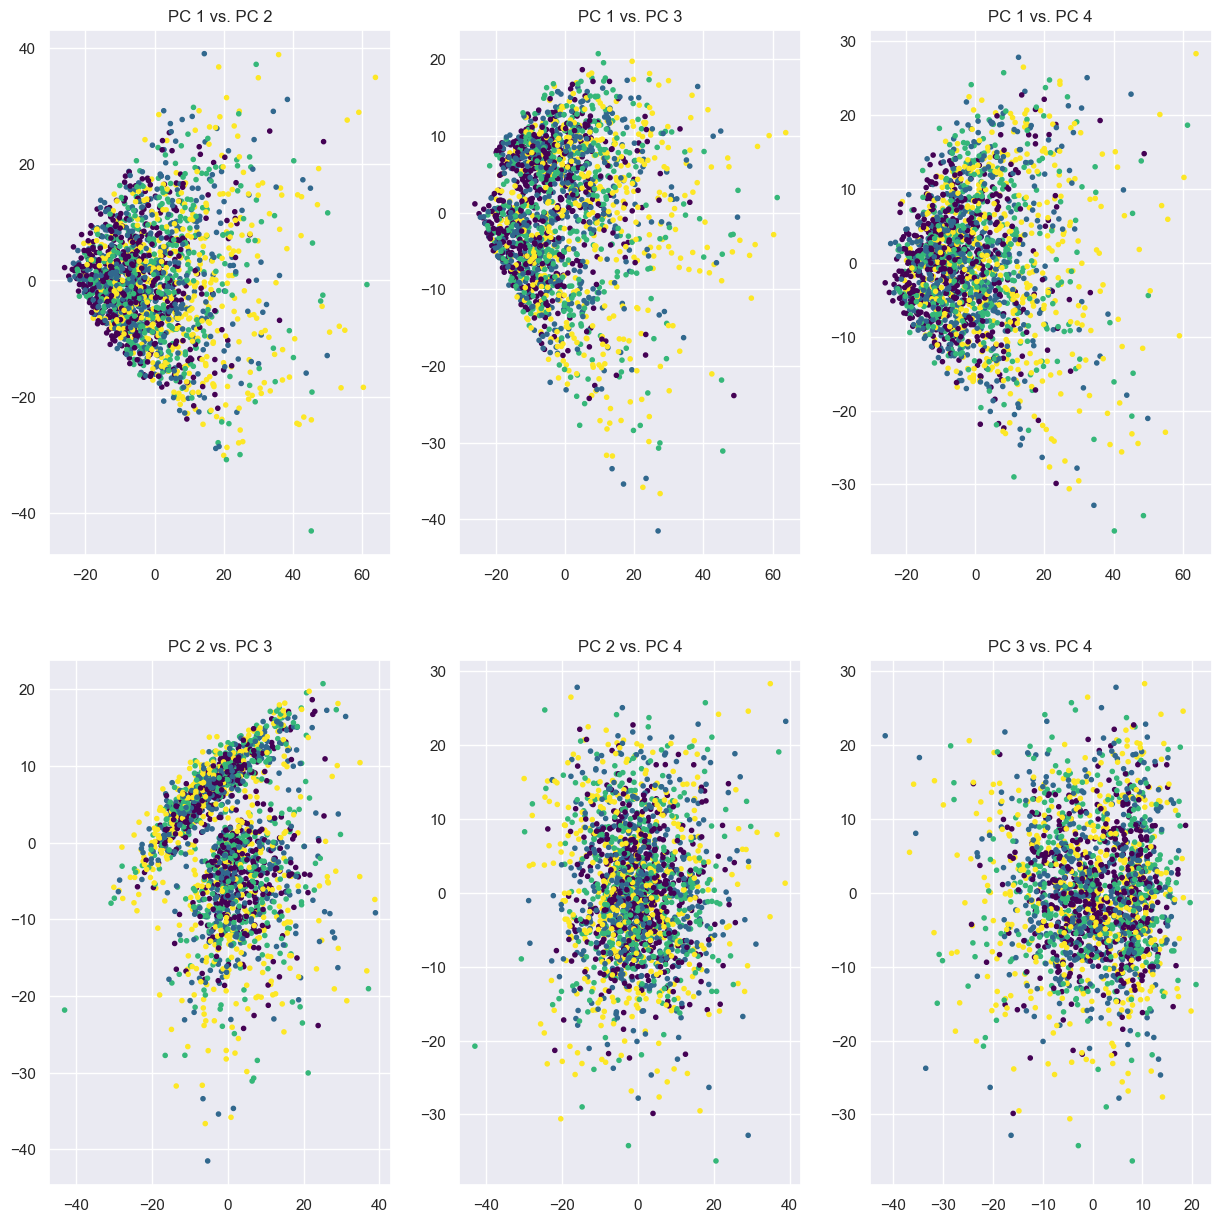

In [25]:
pc_df = PCs_poly_fe_df
pc_df['Class'] = Y  # rmk: the class Y was not changed

fig, ax = plt.subplots(2, 3, figsize=(15,15))


ax[0][0].set_title('PC 1 vs. PC 2')
ax[0][0].scatter(pc_df[0], pc_df[1], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[0][1].set_title('PC 1 vs. PC 3')
ax[0][1].scatter(pc_df[0], pc_df[2], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[0][2].set_title('PC 1 vs. PC 4')
ax[0][2].scatter(pc_df[0], pc_df[3], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][0].set_title('PC 2 vs. PC 3')
ax[1][0].scatter(pc_df[1], pc_df[2], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][1].set_title('PC 2 vs. PC 4')
ax[1][1].scatter(pc_df[1], pc_df[3], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][2].set_title('PC 3 vs. PC 4')
ax[1][2].scatter(pc_df[2], pc_df[3], c = pc_df["Class"], cmap ='viridis', marker=".")

plt.show() 